# Machine Learning Project

In [1]:
#First step to read the file and do EDA(Exploratory Data Analysis) and Pre-Processing

In [2]:
import pandas as pd                      # Importing libraries, pandas for file reading,                                        
import matplotlib.pyplot as plt          # Matplotlib and seaborn for visualisation
import seaborn as sns
import numpy as np                       #Numpy for array operations

In [3]:
data=pd.read_csv('C://Users//shail//Desktop//Study Folder//Python Code//ML Project//Freelance ML Project.csv') 
#reading the file and displaying file
data.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,EUR,60.0,remote,ALL,fixed_price,2023-04-29 18:06:39,We are looking to improve the banner images on...,NaN,2010-11-03,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,GBP,20.0,remote,ALL,fixed_price,2023-04-29 17:40:28,Hello \n\nI need a quick designer to make 4 pi...,NaN,2017-02-21,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,GBP,12.0,remote,ALL,fixed_price,2023-04-29 17:40:06,Hi - I need a bookkeeper to assist with bookke...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,GBP,14.0,remote,ALL,fixed_price,2023-04-29 17:32:01,Hi - I need an accountant to assist me with un...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,USD,10000.0,remote,ALL,fixed_price,2023-04-29 17:09:36,"Hi, I am currently running a project where I w...",NaN,2016-07-01,Mumbai,India,USD,Guest posts buyer


# After reading any data we do following operation to process the data
1-Pulling out basic info of dataset like how many columns are there of which data types, Basically we look at the pattern of data set
   
2-Elimination or Replacing of Null Values

3-Removal of Skewness with help of Boxcox Transformation & Scaling of data

4-Elimination of Outliers

5-Categorical Data Encoding-One Hot Encoding or Label Encoding

6-Data Normalization and Scaling

# 1. Basic EDA Process

In [4]:
data.info()  # This gives info of columns ,Their total counts and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12222 entries, 0 to 12221
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      12222 non-null  object 
 1   Category Name              12222 non-null  object 
 2   Experience                 12222 non-null  object 
 3   Sub Category Name          12222 non-null  object 
 4   Currency                   12222 non-null  object 
 5   Budget                     12222 non-null  float64
 6   Location                   12222 non-null  object 
 7   Freelancer Preferred From  12222 non-null  object 
 8   Type                       12222 non-null  object 
 9   Date Posted                12222 non-null  object 
 10  Description                12222 non-null  object 
 11  Duration                   1602 non-null   object 
 12  Client Registration Date   12222 non-null  object 
 13  Client City                12222 non-null  obj

In [5]:
data.shape
#Number of rows=12222
#number of coloumn=17

(12222, 17)

In [6]:
data.describe()   # describes the data of each column having numeric values

,Budget
count,12222.000000
mean,229.221486
std,1894.327521
min,0.000000
25%,30.000000
50%,80.000000
75%,150.000000
max,99999.000000


In [7]:
data.drop('Sub Category Name',axis=1,inplace=True)  # Removing those columns which are not so important in predicting 'Type' 
data.drop('Description',axis=1,inplace=True)       # as well as those column are having high variance which can affect the model
data.drop('Client Registration Date',axis=1,inplace=True)



# (2) Handling Null Values

#### Null values causes trouble in ML algorithm performance

In [8]:
data.isnull().sum()  # Finding how many null values are there

Title                            0
Category Name                    0
Experience                       0
Currency                         0
Budget                           0
Location                         0
Freelancer Preferred From        0
Type                             0
Date Posted                      0
Duration                     10620
Client City                      0
Client Country                   0
Client Currency                  0
Client Job Title              7634
dtype: int64

Here Duration and Client Job Title is having null values.We can either delete the null values or we can replace them with mean or any other value (Imputation). In this situation we 
cannot delete the values as quantity is very high so we will go for imputation. We'll replace Null values with 'NA' in Duration as well as in  Client Job title

In [9]:
null_index=data.index[data['Duration'].isnull()]  #We will take index of rows having null values
null_index

Int64Index([    0,     1,     2,     3,     4,     5,     7,     8,     9,
               10,
            ...
            12211, 12212, 12213, 12214, 12215, 12216, 12217, 12219, 12220,
            12221],
           dtype='int64', length=10620)

In [10]:
# Replacing null values with 'NA'
data['Duration'].fillna('NA', inplace=True)
data['Client Job Title'].fillna('NA', inplace=True)


In [11]:
data.iloc[null_index]  # As we can see the null places are filled with 'NA'

,Title,Category Name,Experience,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Duration,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),EUR,60.0,remote,ALL,fixed_price,2023-04-29 18:06:39,NA,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),GBP,20.0,remote,ALL,fixed_price,2023-04-29 17:40:28,NA,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),GBP,12.0,remote,ALL,fixed_price,2023-04-29 17:40:06,NA,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),GBP,14.0,remote,ALL,fixed_price,2023-04-29 17:32:01,NA,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),USD,10000.0,remote,ALL,fixed_price,2023-04-29 17:09:36,NA,Mumbai,India,USD,Guest posts buyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12216,Simple SQL Query,Technology & Programming,Entry ($),GBP,30.0,remote,ALL,fixed_price,2023-01-18 19:23:02,NA,London,United Kingdom,GBP,NA
12217,Published Travel Writer required for content c...,Writing & Translation,Entry ($),GBP,50.0,remote,ALL,fixed_price,2023-01-18 19:23:01,NA,Amsterdam,Netherlands,GBP,Wordpress Expert
12219,Simple SQL Query,Technology & Programming,Entry ($),GBP,50.0,remote,ALL,fixed_price,2023-01-18 19:18:48,NA,London,United Kingdom,GBP,NA
12220,"Create a Carbon, Water, Waste Calculating plat...",Design,Expert ($$$),USD,39.0,remote,ALL,hourly,2023-01-18 19:18:47,NA,Noida,India,USD,"Google Adwords, Pay Per Click, Google Shopping..."


In [12]:
data.dtypes       # To check the data types in each coloumn

Title                         object
Category Name                 object
Experience                    object
Currency                      object
Budget                       float64
Location                      object
Freelancer Preferred From     object
Type                          object
Date Posted                   object
Duration                      object
Client City                   object
Client Country                object
Client Currency               object
Client Job Title              object
dtype: object

In [13]:
#Now checking for null values in whole data
data.isnull().sum()


Title                        0
Category Name                0
Experience                   0
Currency                     0
Budget                       0
Location                     0
Freelancer Preferred From    0
Type                         0
Date Posted                  0
Duration                     0
Client City                  0
Client Country               0
Client Currency              0
Client Job Title             0
dtype: int64

All the Null Values are eliminated

# (3) Handling Skewness


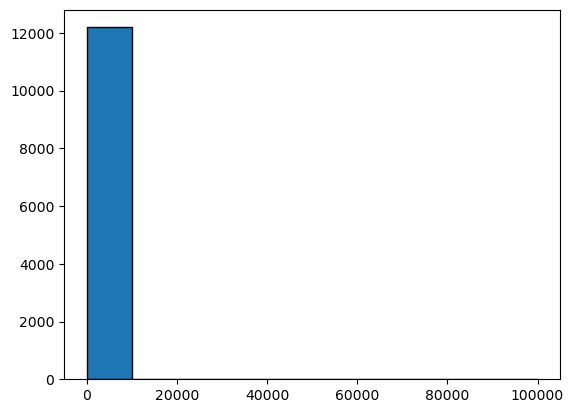

In [14]:
plt.hist(x=data['Budget'],bins=10,edgecolor='black') # Removing skewness in order to make regression model on budget
plt.show()

C:\Users\shail\AppData\Local\Temp\ipykernel_18784\2855799853.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Budget'],bins=40).set(title='Distribution of Budget')


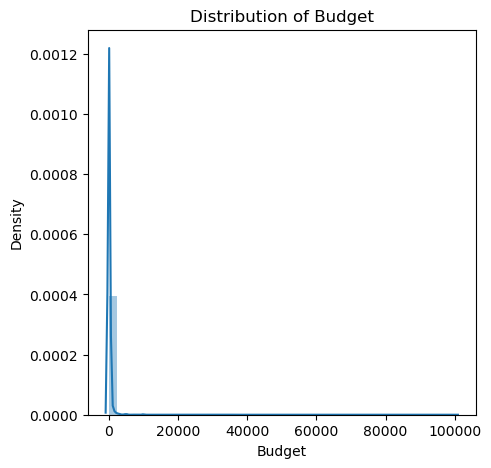

In [15]:
plt.figure(figsize=(5,5))             # As we can see the data isn't normally distributed
sns.distplot(data['Budget'],bins=40).set(title='Distribution of Budget')
plt.show()

<Axes: ylabel='Budget'>

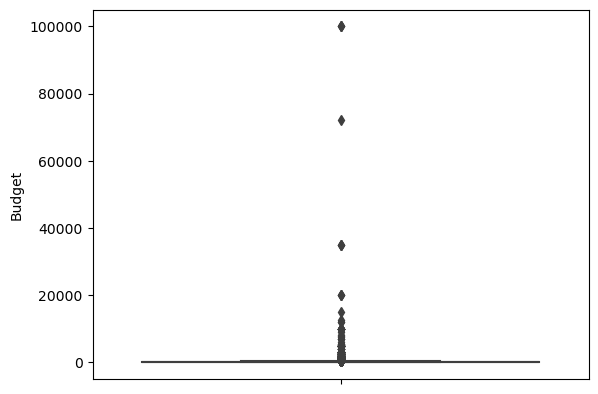

In [16]:
sns.boxplot(data=data,y='Budget')   #Black points reflects outliers

In [17]:
data['Budget'].skew()  #Positive-side skweness

42.455398395555996

In [18]:
data['Budget'].shape

(12222,)

In [19]:
from sklearn.preprocessing import MinMaxScaler  # Importing MinMax package to scale the data. 
                                                # Scaling of data removes ouliers to some extent

scaler=MinMaxScaler()
data['Budget']=scaler.fit_transform(data['Budget'].values.reshape(-1, 1))
data['Budget']

0        0.000600
1        0.000200
2        0.000120
3        0.000140
4        0.100001
           ...   
12217    0.000500
12218    0.000650
12219    0.000500
12220    0.000390
12221    0.000750
Name: Budget, Length: 12222, dtype: float64

In [20]:
from scipy.stats import boxcox # Importing Boxcox, Boxcox also helps in making the data to normal distribution.
budget_transformed,lambda_value=boxcox(data['Budget']+0.00000001)  # Removing zero value as Boxcox doesn't accept zero value.
budget_transformed

array([-6.48620191, -7.30397008, -7.67300672, ..., -6.62423169,
       -6.81083789, -6.31599248])

C:\Users\shail\AppData\Local\Temp\ipykernel_18784\3784059349.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Budget'],color='Red')
C:\Users\shail\AppData\Local\Temp\ipykernel_18784\3784059349.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(budget_transformed)


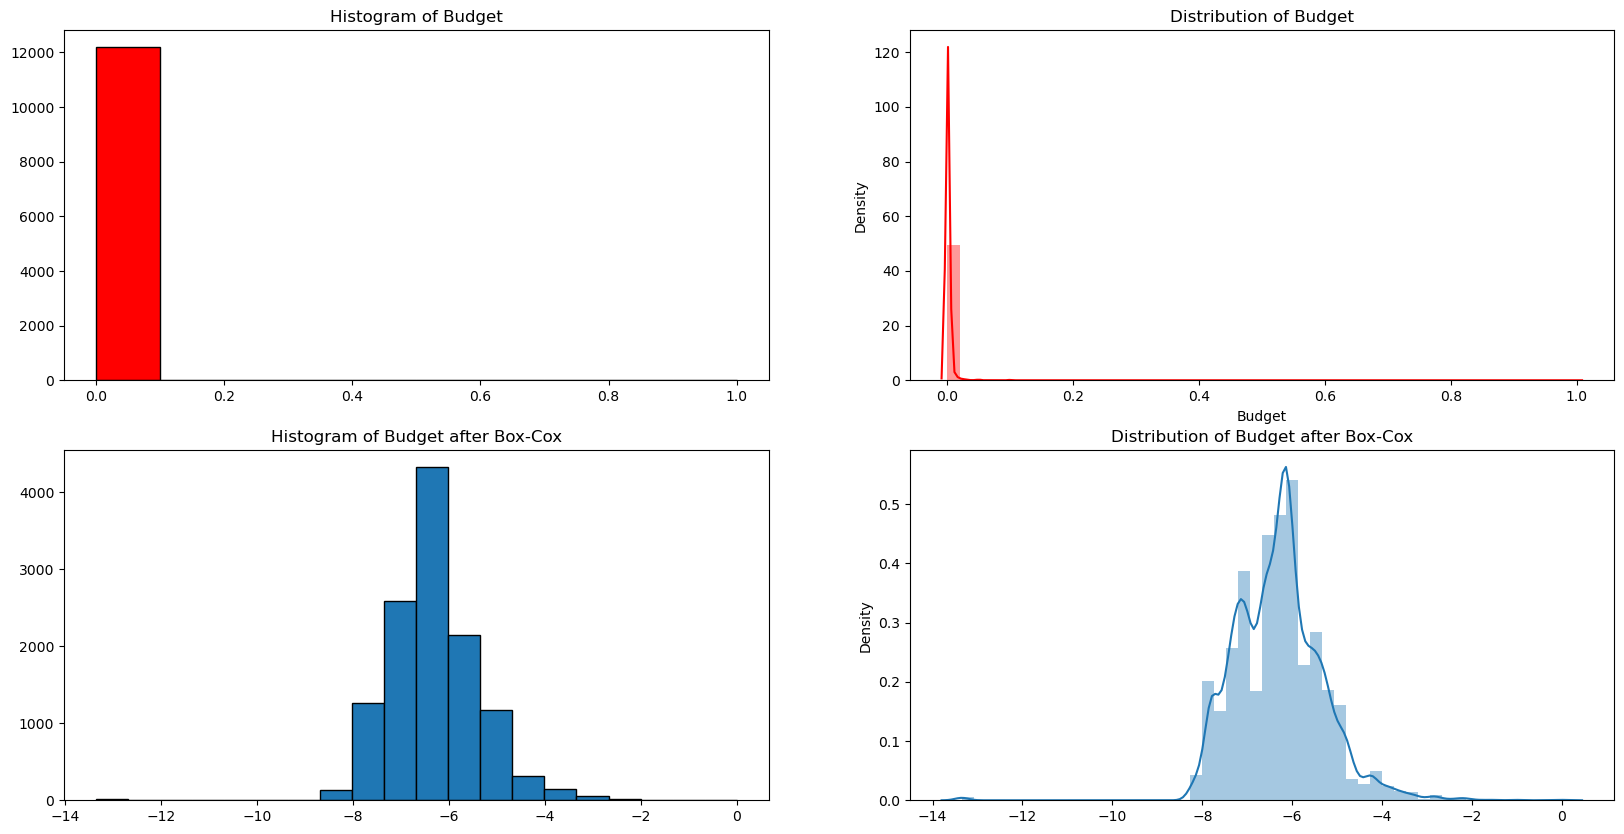

In [21]:
 # visualising distribution before and after Box-cox Transformation

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(data['Budget'],bins=10,edgecolor='black',color='Red')
plt.title('Histogram of Budget')

plt.subplot(2,2,2)
sns.distplot(data['Budget'],color='Red')
plt.title('Distribution of Budget')

plt.subplot(2,2,3)
plt.hist(budget_transformed,bins=20,edgecolor='black')
plt.title('Histogram of Budget after Box-Cox')

plt.subplot(2,2,4)
sns.distplot(budget_transformed)
plt.title('Distribution of Budget after Box-Cox')
plt.show()

In [22]:
data['Budget']=budget_transformed  #Putting Box-Cox Values in Budget

In [23]:
data['Budget'].skew()  # skewness is decreased

0.08963742569871495

# (3) Handling Outliers

 Outliers are those values which are either very large or very small from values next to it.  We can find outliers with the help of Boxplot. By putting condition (<>) we can remove them.



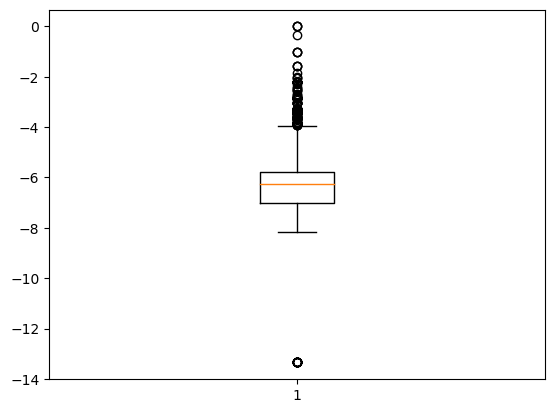

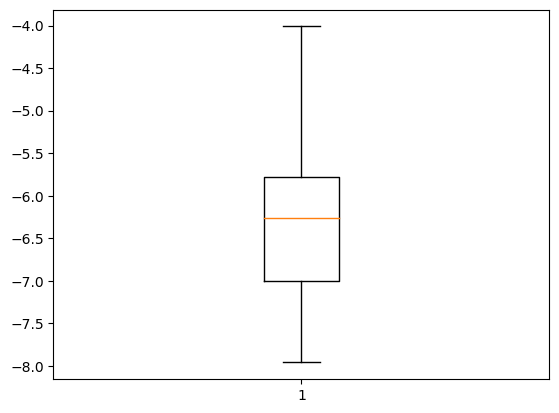

In [24]:
plt.boxplot(data['Budget'])
plt.show()

data['Budget'].gt(-4).value_counts() # as we can see that count of data greater than -4 is very less (239) 
                                     # so we can remove them.
    
outliers_index=data.index[(data['Budget']>-4)|(data['Budget']<-8)]  #Taking index of those points which are >-4 and <-8
outliers_index 

data.drop(outliers_index,axis=0,inplace=True) #deleting the ouliers

plt.boxplot(data['Budget'])  # Outliers are removed
plt.show()


In [25]:
data['Budget'].skew()  # By removing ouliers skewness is also decreased

0.2003027240452245

In [26]:
col_obj=data.select_dtypes('object').columns   # taking those columns which are of object data type
col_obj

Index(['Title', 'Category Name', 'Experience', 'Currency', 'Location',
       'Freelancer Preferred From', 'Type', 'Date Posted', 'Duration',
       'Client City', 'Client Country', 'Client Currency', 'Client Job Title'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder   #Using LabelEncoder to transform the 


for x in col_obj:
    lb=LabelEncoder()
    data[x]=lb.fit_transform(data[x])

In [28]:
newdata=data  #Saving the copy of data to make classification model

In [29]:
data.dtypes # To know data type of each column

Title                          int32
Category Name                  int32
Experience                     int32
Currency                       int32
Budget                       float64
Location                       int32
Freelancer Preferred From      int32
Type                           int32
Date Posted                    int32
Duration                       int32
Client City                    int32
Client Country                 int32
Client Currency                int32
Client Job Title               int32
dtype: object

# Spliting the data into training and testing

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest=train_test_split(data,train_size=0.8,random_state=4)  #training data is 80% of whole data

In [31]:
xtrain.shape  # rows=9460, column=13

(9460, 14)

In [32]:
xtest.shape   # rows=2365, column=13

(2365, 14)

# 2. Making Clusters of Projects which are of  similar types

 To group the similar project we will use K-Means Clustering algorithm 

 As you can see we are having 13 columns which can create curse of dimensionality so with the help of  Principal Component Analysis we will reduce the dimension to 2

## Principal Component Analysis

In [33]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2) #we have put 2 because we want data in 2D format (We can visualize easily in 2D)
xtrain=pca.fit_transform(xtrain) #perform pca on training set
xtest=pca.transform(xtest) #perform pca on testing set

print(xtrain.shape)
print(xtest.shape)

(9460, 2)
(2365, 2)


#### Here you can see columns are reduced from 13 to 2

In [34]:
sum(pca.explained_variance_ratio_) # 98% of variance is preserved while transforming

0.9823413851786172

## Using Elbow method to find best no. of Centroids

To find the best number of centroids we will plot Elbow Graph

In [35]:
from sklearn.cluster import KMeans #import clustering module from sklearn
WCSSlist = []
for i in range (1,11):    #creating loop to find best value
    model = KMeans(n_clusters = i)
    model.fit(xtrain)
    WCSS = model.inertia_ #calculate Within-Cluster-Sum-of-Squares
    WCSSlist.append(WCSS)
print(WCSSlist)    

C:\Users\shail\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shail\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shail\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shail\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shail\anaconda3\lib\site-packages\sklearn\clust

[165478482469.03854, 91563392134.87415, 62411533767.791664, 41020212464.07827, 33067869680.042236, 27040540443.180614, 23713185049.79819, 20485108341.318302, 18168828247.828773, 16290997022.750748]


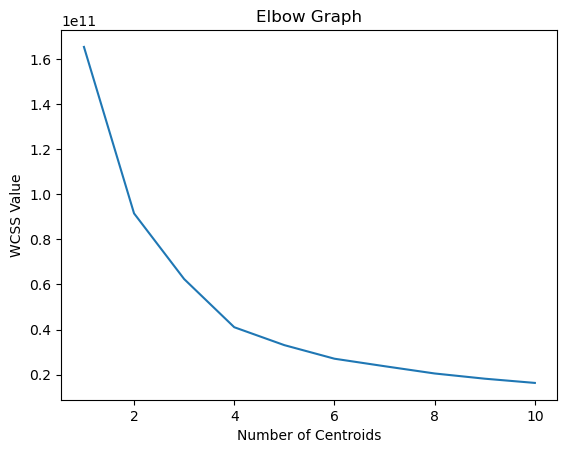

In [36]:
# Plotting Elbow Graph 

plt.title('Elbow Graph')
plt.plot(range(1,11),WCSSlist)
plt.xlabel('Number of Centroids')
plt.ylabel('WCSS Value')
plt.show()

We can clearly see that after 4 centroids WCSS is not reducing gradually, Therefore we are going to make centroids

### Creating model with 4 clusters

In [37]:
model=KMeans(n_clusters=4)
model.fit(xtrain)
pred=model.predict(xtest)
pred[:5]

C:\Users\shail\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 3, 2])

In [38]:
print(pd.Series(pred).value_counts())  # Counts in each segment

3    633
0    600
1    584
2    548
dtype: int64


In [39]:
model.cluster_centers_  # Co-ordinates of centroids

array([[-2644.07795654,  2400.27581864],
       [-2829.43305192, -2230.31964632],
       [ 2894.42632155,  2297.54068437],
       [ 2810.99222063, -2314.88361506]])

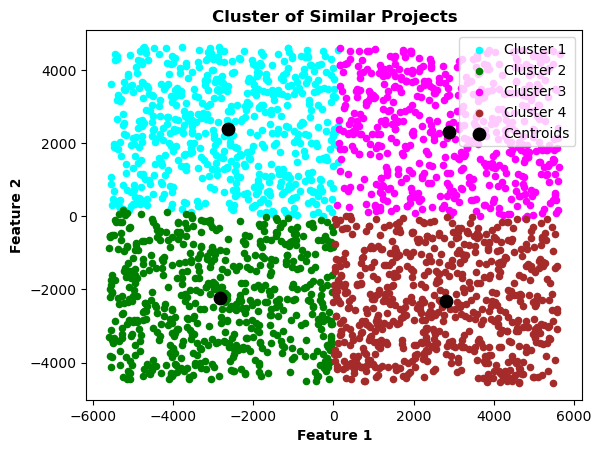

In [40]:
# Creating visualization for Clusters

plt.scatter(xtest[pred==0, 0],xtest[pred==0, 1],s=20,c='cyan',label='Cluster 1')
plt.scatter(xtest[pred==1, 0],xtest[pred==1, 1],s=20,c='green',label='Cluster 2')
plt.scatter(xtest[pred==2, 0],xtest[pred==2, 1],s=20,c='magenta',label='Cluster 3')
plt.scatter(xtest[pred==3, 0],xtest[pred==3, 1],s=20,c='brown',label='Cluster 4')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=80,c='Black',label='Centroids')


plt.title('Cluster of Similar Projects',weight='bold')
plt.xlabel('Feature 1', weight='heavy')
plt.ylabel('Feature 2', weight='heavy')
plt.legend()
plt.show()

# 3. Regression Model to Predict the Budget

In [41]:
x=data.drop(columns=['Budget'])   #Budget is our taget column 
y=data['Budget']

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=4)

Before going forward with RamdomForest , Logistic regression, Ridge and Lasso was applied but R2 Score as not more than 0.62
 
Reason why RandomForest gives best result because it works on the concept of bagging. In bagging, a group of models is trained on different subsets of the dataset, and the final output is generated by collating the outputs of all the different models.

This data set is very large having 11825 rows and 13 columns 
 

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()
model.fit(xtrain, ytrain) 
trainpred = model.predict(xtrain) 
testpred = model.predict(xtest)



print('R2 Score of Training  :', np.round(r2_score(ytrain,trainpred),2))
print('R2 Score of Testing :', np.round(r2_score(ytest,testpred),2))
print()


print('Mean Squared Error of Training  :', np.round(mean_absolute_error(ytrain,trainpred),2))
print('Mean Squared Error of Testing :', np.round(mean_absolute_error(ytest,testpred),2))

R2 Score of Training  : 0.95
R2 Score of Testing : 0.66

Mean Squared Error of Training  : 0.13
Mean Squared Error of Testing : 0.36


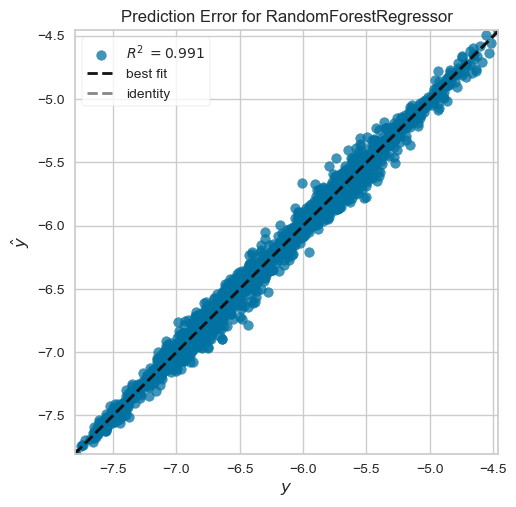

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [44]:
from yellowbrick.regressor import PredictionError  #Importing Yellowbrick package to visualize Error
model=RandomForestRegressor()
visualizer=PredictionError(model)
visualizer.fit(xtrain,ytrain)
visualizer.score(xtest,testpred)
visualizer.show()

Yellowbrick helps in visualising the error we got between actual & prediction

# 4.Classification Model to Predict 'Type'

Here target column is to predict the 'Type' of the job ie.fixed price or hourly

Using Random Forest Classifier as it is best model. It takes subsets of data and train multipe desicion trees. It has a ability to reduce the variance without increasing the bias

In [45]:
newdata   # this is out dataset

,Title,Category Name,Experience,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Duration,Client City,Client Country,Client Currency,Client Job Title
0,938,1,0,0,-6.486202,1,1,0,9129,20,481,60,0,1160
1,6165,7,0,1,-7.303970,1,1,0,9128,20,918,128,1,1111
2,1074,0,0,1,-7.673007,1,1,0,9127,20,918,128,1,1176
3,452,0,0,1,-7.562380,1,1,0,9126,20,918,128,1,1176
5,1747,6,1,0,-4.810608,1,1,0,9125,20,480,127,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7708,8,0,1,-6.624232,1,1,0,2,20,46,87,1,1764
12218,8521,1,2,1,-6.425309,2,16,0,1,3,544,128,1,491
12219,8641,6,0,1,-6.624232,1,1,0,1,20,918,128,1,1090
12220,1980,1,1,2,-6.810838,1,1,1,0,20,1107,57,2,758


### Spliting the data into x and y

In [46]:
x=newdata.drop(columns=['Type'])
y=newdata['Type']

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=4)

In [48]:
from sklearn.ensemble import RandomForestClassifier    # Import Random Forest Classifier package

model=RandomForestClassifier(n_estimators=1000)
model.fit(xtrain,ytrain)
testpred=model.predict(xtest)
trainpred=model.predict(xtrain)



In [49]:
from sklearn.metrics import classification_report     # Import Classification Report package
print(classification_report(ytrain,trainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8073
           1       1.00      1.00      1.00      1387

    accuracy                           1.00      9460
   macro avg       1.00      1.00      1.00      9460
weighted avg       1.00      1.00      1.00      9460



Confusion Matrix for Random Forest Training Prediction


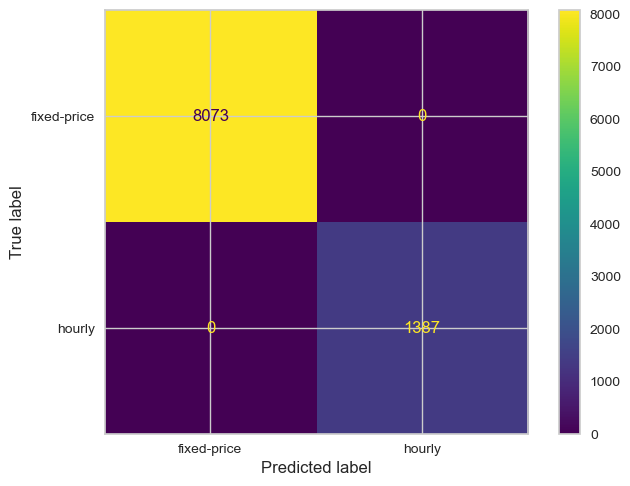

In [50]:
from sklearn import metrics

cm=metrics.confusion_matrix(ytrain,trainpred)
cm=metrics.ConfusionMatrixDisplay(cm,display_labels=['fixed-price','hourly'])
print ('Confusion Matrix for Random Forest Training Prediction')
cm.plot()
plt.show()

In [51]:
print(classification_report(ytest,testpred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2005
           1       0.92      0.77      0.84       360

    accuracy                           0.95      2365
   macro avg       0.94      0.88      0.91      2365
weighted avg       0.95      0.95      0.95      2365



Confusion Matrix for Random Forest Test Prediction


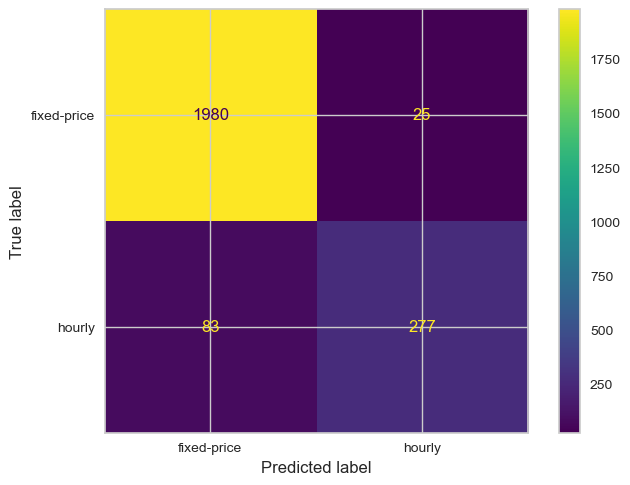

In [52]:
cm=metrics.confusion_matrix(ytest,testpred)
cm=metrics.ConfusionMatrixDisplay(cm,display_labels=['fixed-price','hourly'])
print ('Confusion Matrix for Random Forest Test Prediction')
cm.plot()
plt.show()

We can see with the help of confusion matrix that number of False Positive and False Negative is very low.